In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [35]:
pd.set_option("display.max_columns", None) # To see all the columns name
pd.set_option("display.max_rows", None) # To see all the rows name.

In [36]:
leads = pd.read_csv("leads.csv")

In [37]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [38]:
leads.shape

(9240, 37)

In [39]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### From the above information we see that there are a lot of missing values to be fixed or removed

In [40]:
#### From the case study we have to replace "Select" to missing values.

In [41]:
leads = leads.replace("Select", np.nan)

In [42]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [43]:
100*leads.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [44]:
leads["How did you hear about X Education"].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [45]:
leads["Lead Profile"].value_counts()

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

#### Some of the columns have high % of missing values. It is better to drop those to ease our analysis. For this we can cap it at 40%

In [49]:
### Removing columns
cols_to_be_removed = ["How did you hear about X Education", "Lead Quality", "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score" ]

In [51]:
len(cols_to_be_removed)

7

In [52]:
cols_to_be_removed

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [54]:
leads.drop(cols_to_be_removed, axis=1, inplace=True)

In [56]:
leads.shape ### Missing values columns have been removed

(9240, 30)

In [57]:
leads.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

### There are quite a number of missing values in Specialization. We can replace those with "Others"

In [59]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [60]:
leads["Specialization"].isnull().sum()

0

### There are quite a number of missing values in Tags.

In [62]:
leads.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [64]:
### We can replace Tags missing values with mode that is "Will revert after reading the email"
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

In [65]:
leads["Tags"].isnull().sum()

0

In [66]:
leads.City.value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [67]:
### We can replace City missing values with mode that is "Mumbai"
leads["City"] = leads["City"].replace(np.nan, 'Mumbai')

In [68]:
leads["City"].isnull().sum()

0

In [69]:
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [70]:
#### We can impute the value with Mode. That is "Unemployed"
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan, "Unemployed")

In [71]:
leads["What is your current occupation"].isnull().sum()

0

In [79]:
leads["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

### We can remove this column as it doesn't hurt our analysis

In [80]:
leads=leads.drop('What matters most to you in choosing a course',axis=1)

In [84]:
leads.shape

(9240, 29)

In [82]:
leads.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

### We can impute Country missing value with the mode. That is India

In [85]:
leads["Country"]= leads["Country"].replace(np.nan, 'India')

In [86]:
leads["Country"].isnull().sum()

0

In [87]:
100*leads.isnull().mean()

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

In [88]:
#### We have few rows that has missing values we can just drop with dropna function

In [89]:
leads.dropna(inplace=True)

In [90]:
100*leads.isnull().mean()

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

#### Missing values have been treated. Now we can carry on the EDA process

We can also drop the Prospect ID column has it contains integers, string characters

In [96]:
leads = leads.drop('Prospect ID', axis=1)

In [99]:
leads.shape

(9074, 28)

In [100]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


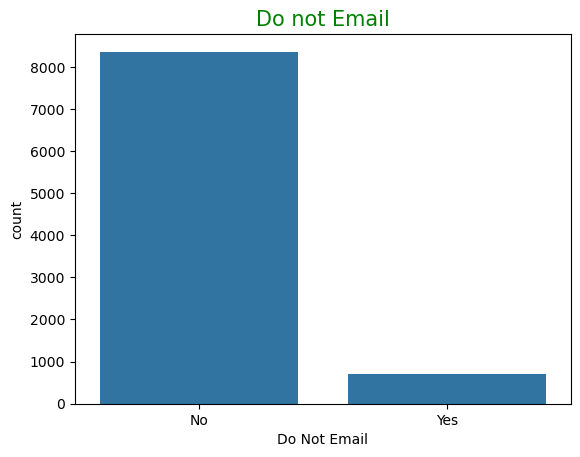

In [102]:
sns.countplot(x = 'Do Not Email', data=leads)
plt.title("Do not Email", fontsize=15, color='green')
plt.show()

#### There are more people who have said "NO" than "YES".

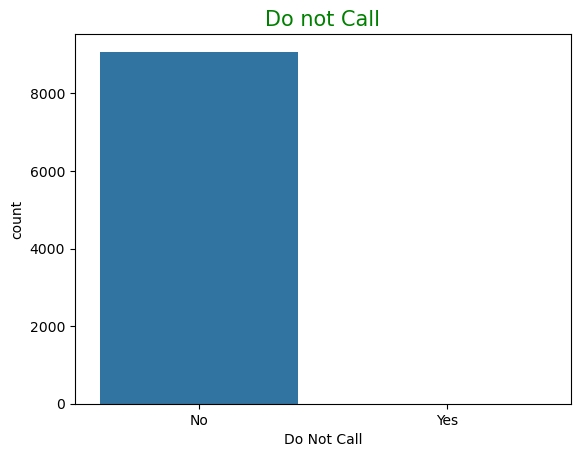

In [103]:
sns.countplot(x = 'Do Not Call', data=leads)
plt.title("Do not Call", fontsize=15, color='green')
plt.show()

#### There are more people who have said "NO" than "YES".

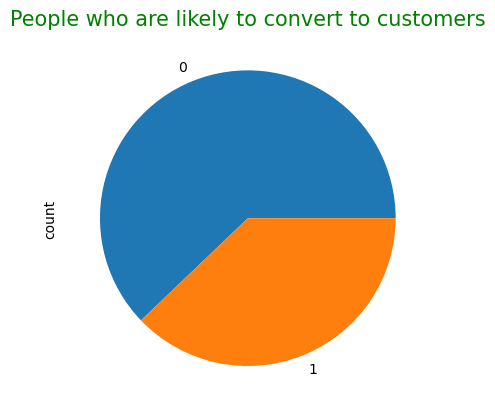

In [105]:
leads["Converted"].value_counts().plot.pie()
plt.title("People who are likely to convert to customers", fontsize = 15, color='green')
plt.show()

#### There are only few people that are likely to convert from this dataset

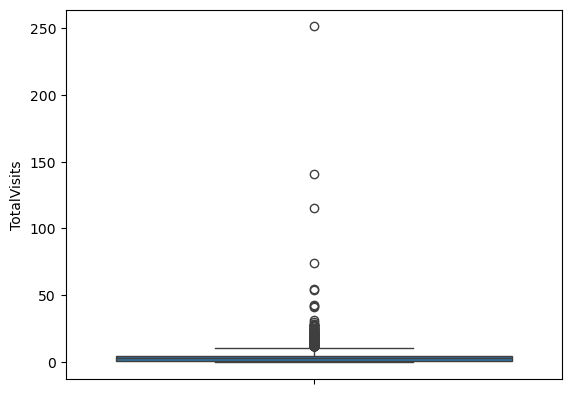

In [106]:
sns.boxplot(leads["TotalVisits"])
plt.show()

#### There are number of outliers. 

In [109]:
q1 = leads["TotalVisits"].describe() ["25%"]
q3 = leads["TotalVisits"].describe() ["75%"]
iqr = q3-q1
upper_bound = q3+1.5*iqr
lower_bound = q1-1.5*iqr
print(lower_bound, upper_bound)

-5.0 11.0


In [110]:
leads["TotalVisits"] = np.where(leads["TotalVisits"]>upper_bound, upper_bound, leads["TotalVisits"])
leads["TotalVisits"] = np.where(leads["TotalVisits"]<lower_bound, lower_bound, leads["TotalVisits"])

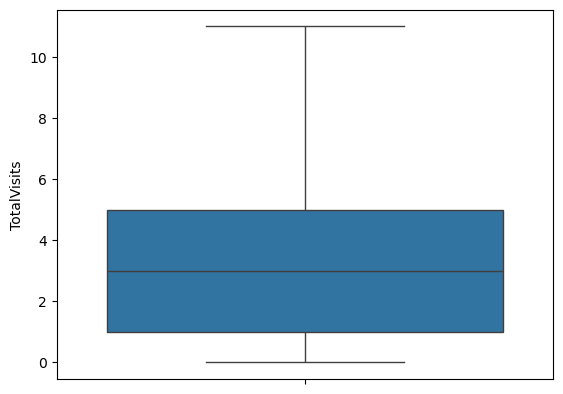

In [111]:
sns.boxplot(leads["TotalVisits"])
plt.show()

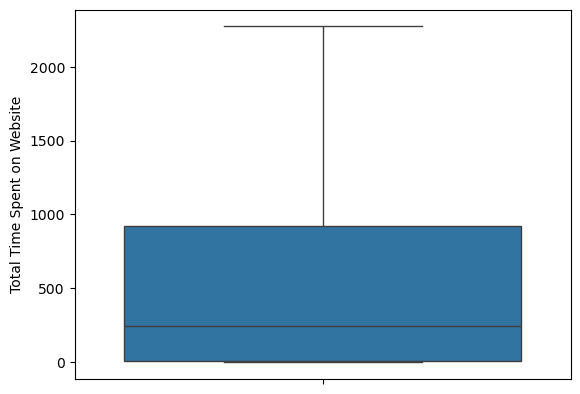

In [112]:
sns.boxplot(leads["Total Time Spent on Website"])
plt.show()

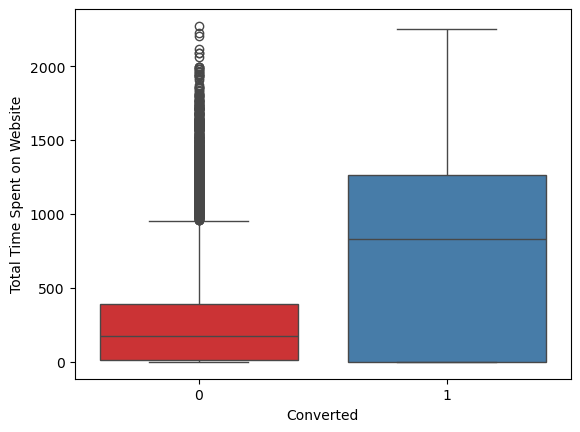

In [113]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set1')
plt.show()

#### People who spent more time on website are likely to convert to customers

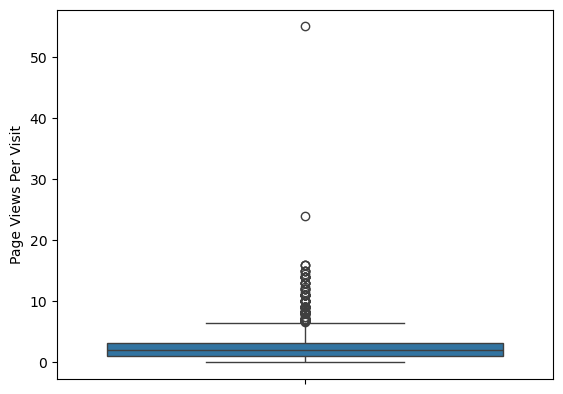

In [114]:
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

In [115]:
q1 = leads["Page Views Per Visit"].describe() ["25%"]
q3 = leads["Page Views Per Visit"].describe() ["75%"]
iqr = q3-q1
upper_bound = q3+1.5*iqr
lower_bound = q1-1.5*iqr
print(lower_bound, upper_bound)

-2.3000000000000003 6.5


In [116]:
leads["Page Views Per Visit"] = np.where(leads["Page Views Per Visit"]>upper_bound, upper_bound, leads["Page Views Per Visit"])
leads["Page Views Per Visit"] = np.where(leads["Page Views Per Visit"]<lower_bound, lower_bound, leads["Page Views Per Visit"])

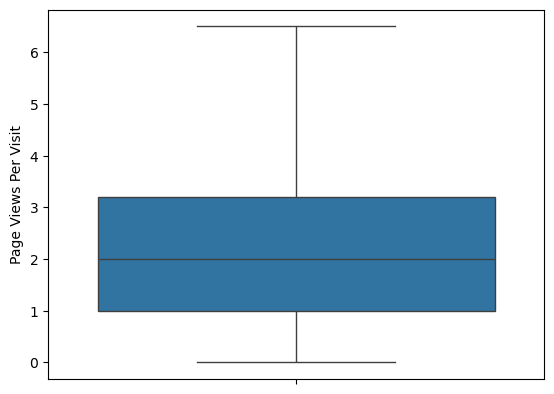

In [117]:
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

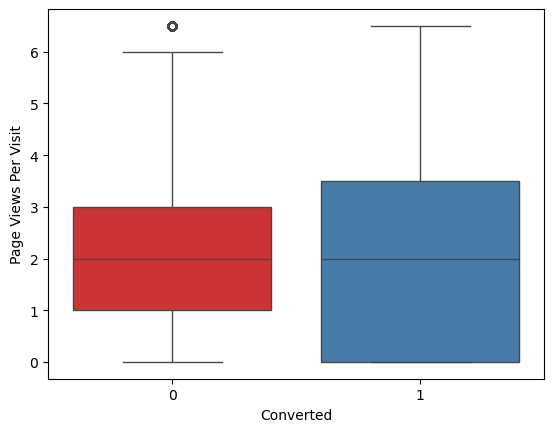

In [118]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads,palette='Set1')
plt.show()

#### Median for both is same. 

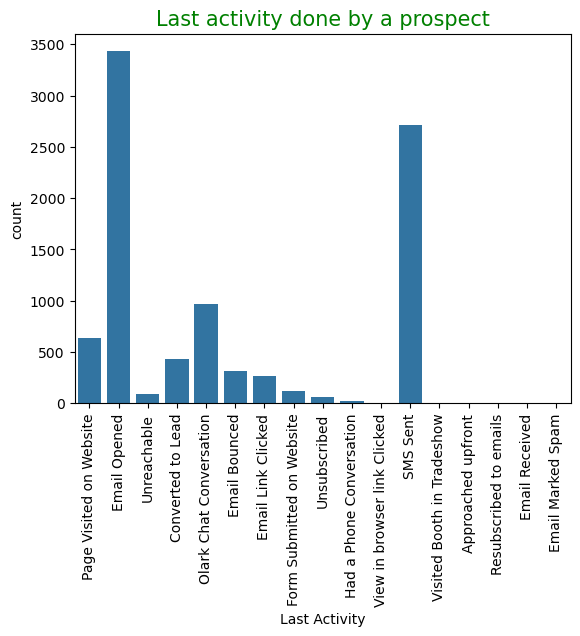

In [122]:
sns.countplot(x = 'Last Activity', data=leads)
plt.title("Last activity done by a prospect", fontsize=15, color='green')
plt.xticks(rotation = 90)
plt.show()

#### More people have opened the email and SMS sent

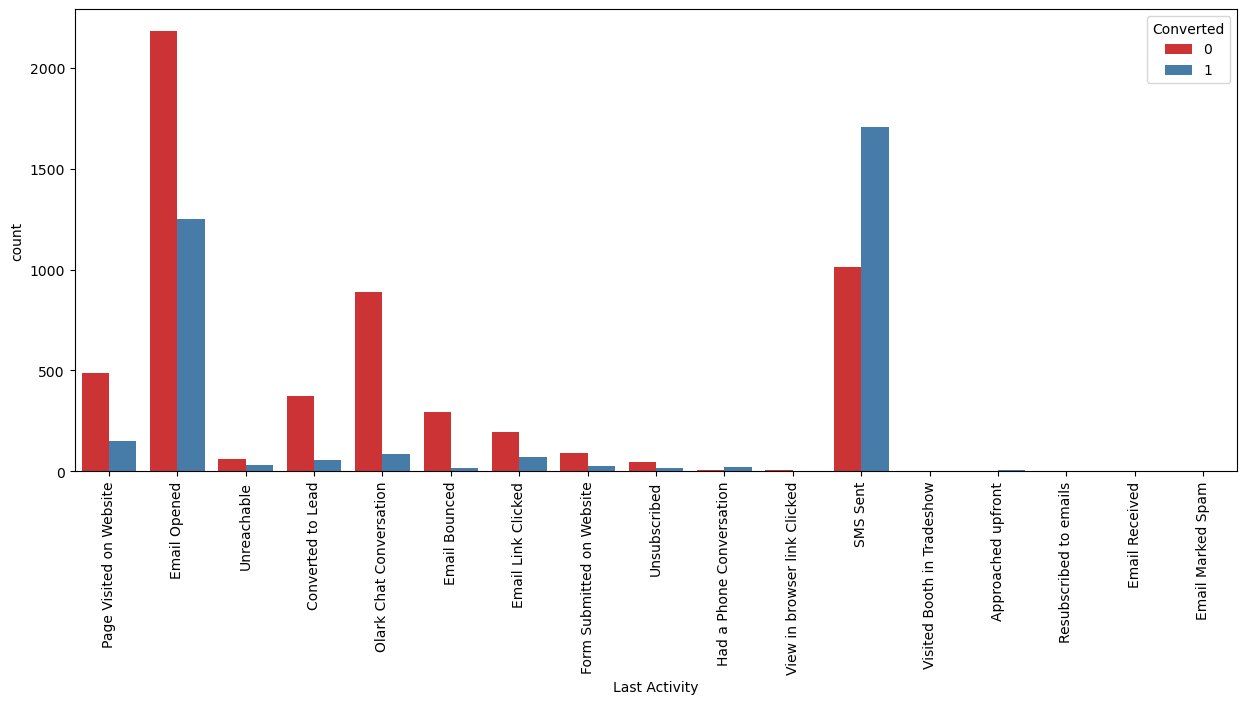

In [124]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Those who have opened the email and sent as SMS are likely to convert

In [125]:
leads["Specialization"].value_counts()

Specialization
Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

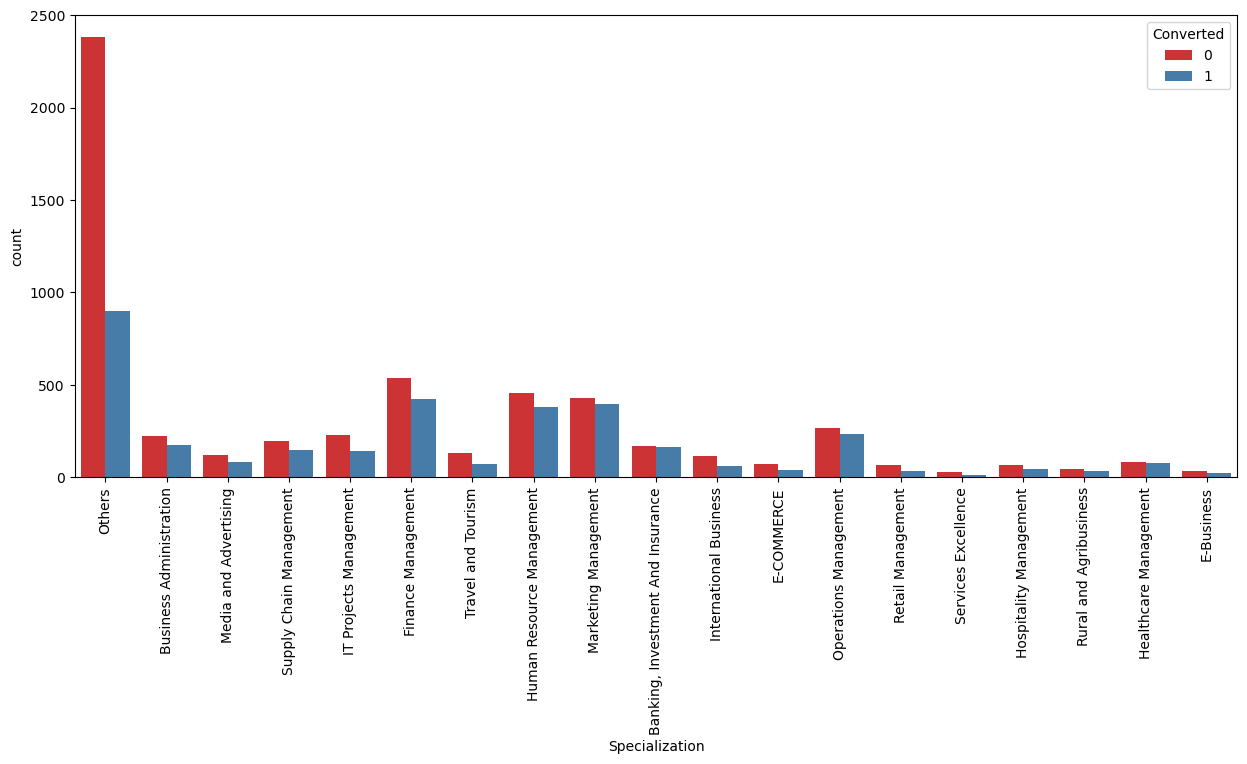

In [126]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Company should focus on specialization that gets them more customers

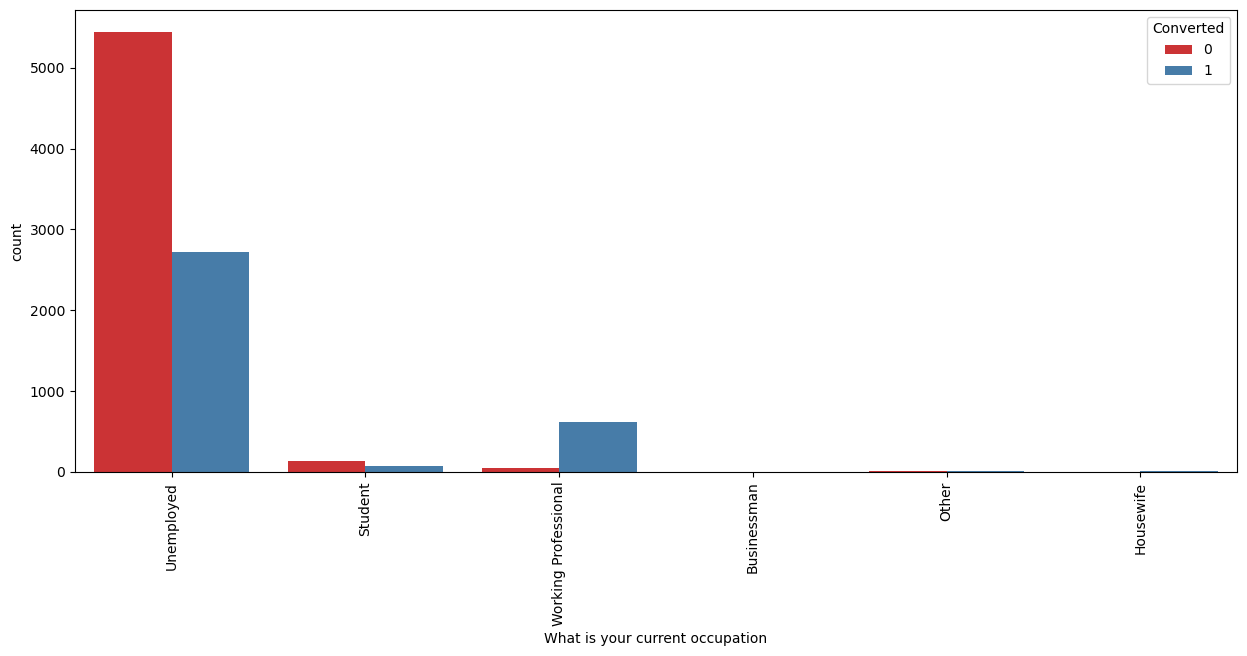

In [127]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Company should focus on Unemployed and Working professionals

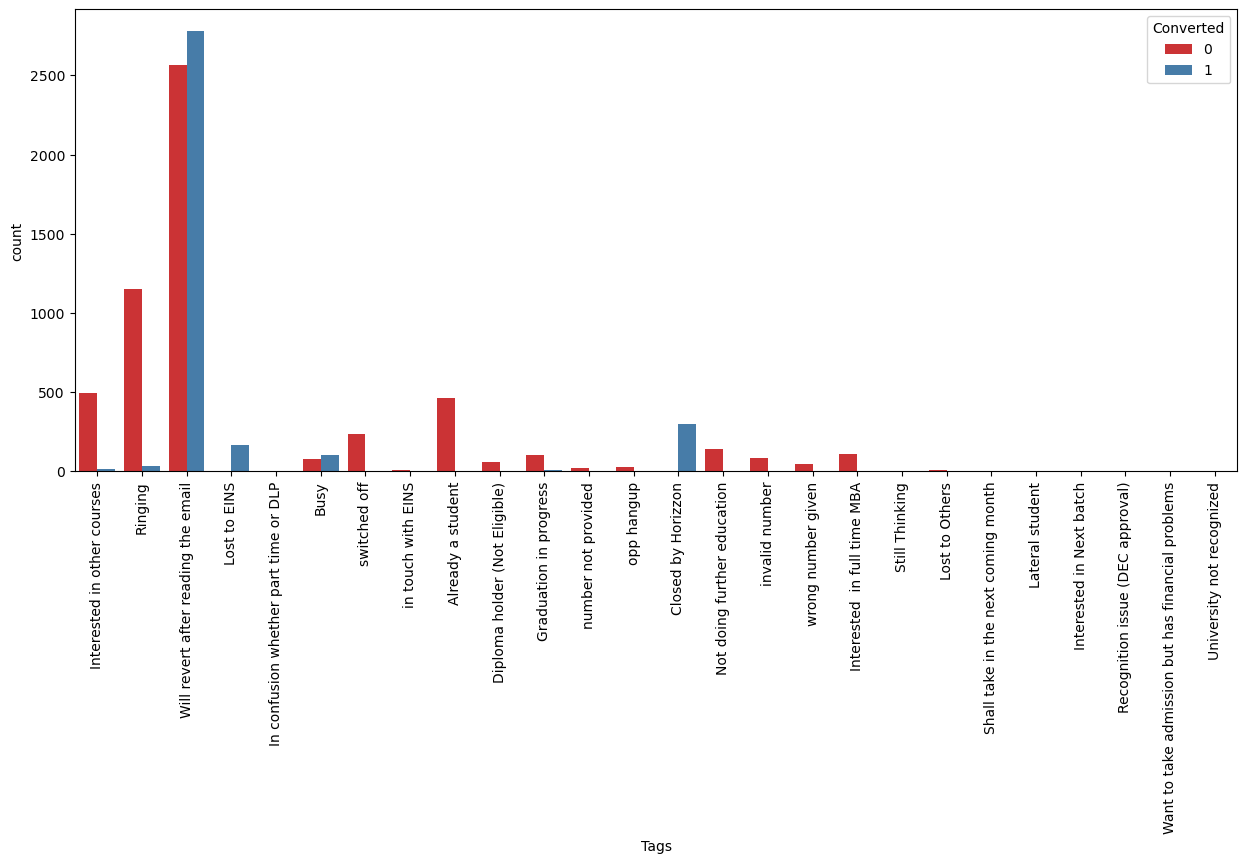

In [128]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### This is not good for building a model. We can remove this column later

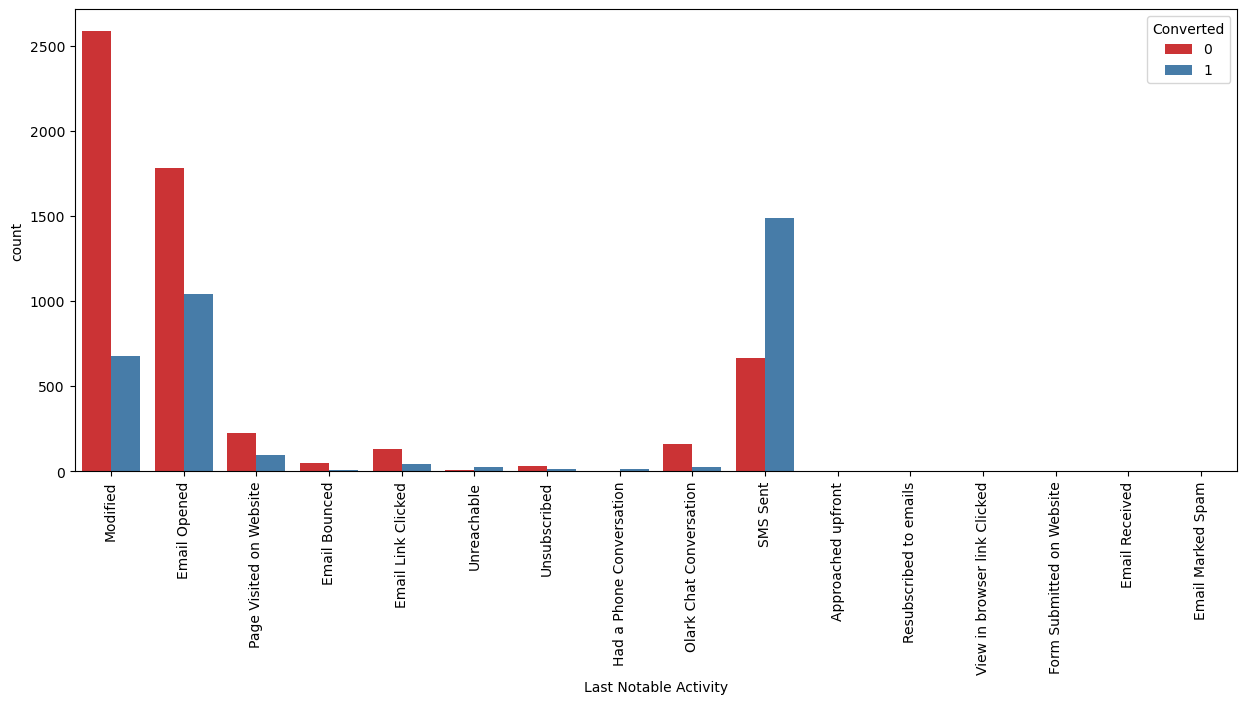

In [129]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Company should focus more on Email Opened and SMS sent 

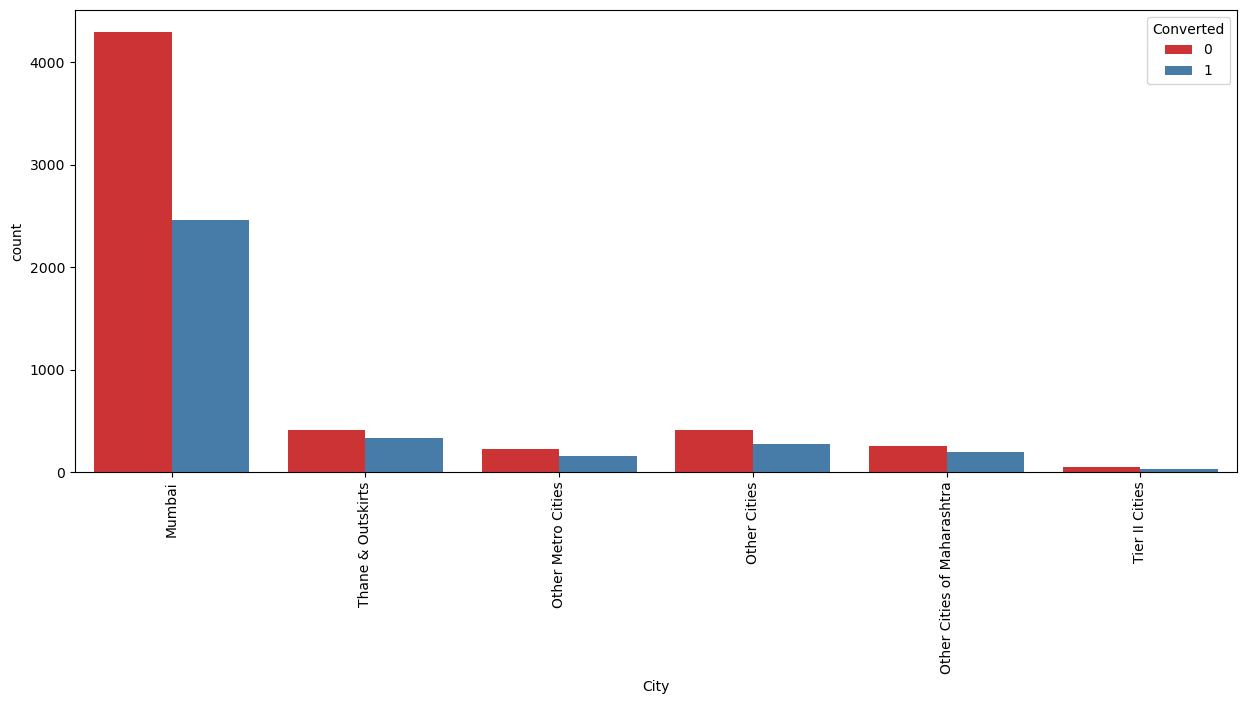

In [130]:
plt.figure(figsize=(15,6))
sns.countplot(x = "City", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Most prospects are from Mumbai. Company can spend more time in this city.

### Most of the columns are not required for model building so we will be removing those columns.

In [131]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [135]:
cols_removed = ["Lead Number", "Tags", "Country", "Search", "Magazine", "Newspaper Article", "X Education Forums","Newspaper",
               "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", 
               "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque",
               "A free copy of Mastering The Interview"]

In [136]:
len(cols_removed)

15

In [137]:
leads = leads.drop(cols_removed, axis=1)

In [138]:
leads.shape

(9074, 13)

In [139]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activity    

In [140]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.230769,482.887481,2.285762
std,0.485053,2.880797,545.256560,1.834443
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,11.000000,2272.000000,6.500000


### EDA process is done. We have fixed all the missing values and imputed. Removed unwanted columns for model building.